In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('tasks/12.txt', 'r') as f:
    data = f.read().splitlines()

In [2]:
heightmap = np.array([[ord(y) - 97 for y in list(x)] for x in data])

In [3]:
y_start, x_start = np.where(heightmap==-14)
y_start, x_start = int(y_start), int(x_start)

y_finish, x_finish = np.where(heightmap==-28)
y_finish, x_finish = int(y_finish), int(x_finish)

heightmap[y_start, x_start] = -1
heightmap[y_finish, x_finish] = 26

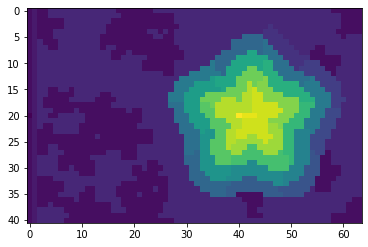

In [4]:
plt.imshow(heightmap)

In [5]:
# Part 1
visited = {
   (y_start, x_start): 0 
}
path_len = 0
new_visited = visited.copy()
path_len += 1

while not visited.get((y_finish, x_finish)):
    for v in visited:
        old_hight = heightmap[v[0], v[1]]
        for y_, x_ in ((v[0] - 1, v[1]),( v[0] + 1, v[1]), (v[0], v[1] - 1), (v[0], v[1] + 1)):
            if x_ < 0 or y_ < 0 or x_ >= heightmap.shape[1] or y_ >= heightmap.shape[0]:
                continue
            location = visited.get((y_, x_))
            new_hight = heightmap[(y_, x_)]
            if (location is None) and (new_hight - old_hight <= 1):
                new_visited[(y_, x_)] = path_len
        visited = new_visited.copy()
    path_len += 1

pathes = []
zero_coords = [tuple(x) for x in np.array(np.where(heightmap==0)).T]
for k, v in visited.items():
    pathes.append(k)

for p in pathes[::-1]:
    if p in zero_coords:
        break
visited.get((y_finish, x_finish)) - visited[p]

272

In [6]:
# Part 2
visited = {
   (y_finish, x_finish): 0 
}
path_len = 0
new_visited = visited.copy()
path_len += 1

is_not_zero = True
while is_not_zero:
    for v in visited:
        old_hight = heightmap[v[0], v[1]]
        for y_, x_ in ((v[0] - 1, v[1]),( v[0] + 1, v[1]), (v[0], v[1] - 1), (v[0], v[1] + 1)):
            if x_ < 0 or y_ < 0 or x_ >= heightmap.shape[1] or y_ >= heightmap.shape[0]:
                continue
            location = visited.get((y_, x_))
            new_hight = heightmap[(y_, x_)]

            if (location is None) and (new_hight -old_hight >= -1):
                new_visited[(y_, x_)] = path_len
                if new_hight == 0:
                    is_not_zero = False
        visited = new_visited.copy()
    path_len += 1
sorted(visited.values())[-1]

363